FFT is useful for finding natural frequency. This can be done by testing variable frequencies i.e. linear sweep. 

https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html

In [ ]:
import os
from scipy.io.wavfile import read
import scipy.fft, scipy.fftpack
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
mypath = '/normalized_recordings'
os.chdir(mypath)

In [ ]:
filenames = sorted([f for f in os.listdir(mypath) if f.endswith('LinearSweep490s.wav')])
filenames

In [ ]:
file_sample_dict = {
    'Cheese1_200Hz-10KHzLinearSweep490s.wav':"Cheese Sample-1",
    'Cheese2_200Hz-10KHzLinearSweep490s.wav': "Cheese Sample-2",
    'Cheese3_200Hz-10KhzLinearSweep490s.wav': "Cheese Sample-3",
    'OrganicButter_200Hz-10KHzLinearSweep490s.wav':"Organic Butter Sample",
    'NonorganicButter_200Hz-10KHzLinearSweep490s.wav': "Non-Organic Butter with NDA Sample",
    'Empty_200Hz-10KHzLinearSweep490s.wav': "No Sample"
}

In [ ]:
def plot_fft(f, file_sample_dict, plot="double-sided", freq_range=1000):
  fs_rate, signal = read(f)
  signal = signal[fs_rate*1:-fs_rate*1] # cut the first and the last 1 sec to avoid any noise

  N = signal.shape[0]
  secs = N / float(fs_rate)
  Ts = 1.0/fs_rate # sampling interval in time (Timestep between samples)
  t = np.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray

  # Double sided FFT: Full spectrum
  if plot=="double-sided":
    FFT = scipy.fft.fft(signal)
    freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0]) # Returns the Discrete Fourier Transform sample frequencies
    fft_freqs = np.array(freqs)
    # FFT Normalize (0-1)
    max_value = max(abs(FFT))
    FFT_norm = FFT/max_value

    plt.plot(freqs, FFT_norm, "b") # plotting the complete fft spectrum - NORMALIZED 0-1
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude (Scaled)')
    plt.xlim(-freq_range,freq_range)
    plt.ylim(-1.0,1.0)
    plt.title("FFT for " + file_sample_dict[f])
    plt.grid()
    plt.show()

  # Single sided FFT: Positive spectrum
  elif plot=="single-sided":
    FFT = scipy.fft.fft(signal)
    freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
    FFT_side = abs(FFT)[range(N//2)] # one side FFT range
    freqs_side = freqs[range(N//2)] # one side frequency range
    fft_freqs_side = np.array(freqs_side)
    # FFT Normalize (0-1)
    side_max_value = max(FFT_side)
    FFT_side_norm = FFT_side / side_max_value

    plt.plot(freqs_side, abs(FFT_side_norm), "b") # plotting the positive fft spectrum - NORMALIZED 0-1
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude (Scaled)')
    plt.xlim(0,freq_range)
    plt.ylim(0,1.0)
    plt.title("FFT for " + file_sample_dict[f])
    plt.grid()
    plt.show()
    
  # Plot the signal amplitude
  elif plot=="amplitude":
    plt.plot(t, signal, "g") 
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(f)
    plt.grid()
    plt.show()


## FFT plots for 1000 Hz range

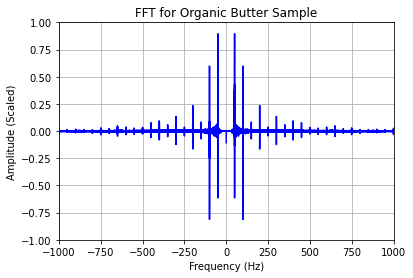

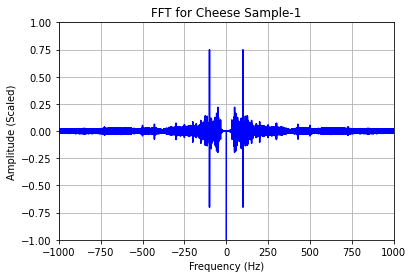

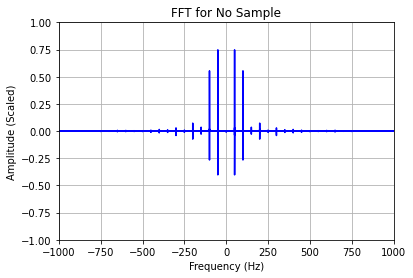

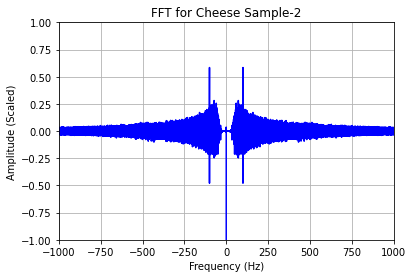

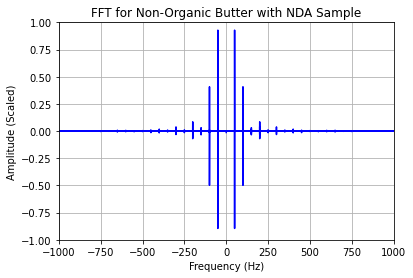

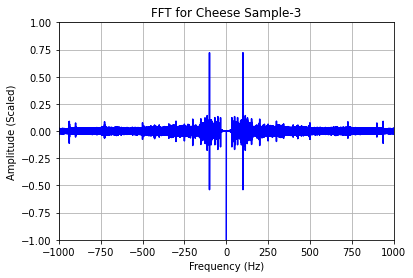

In [ ]:
for f in filenames:
  plot_fft(f, file_sample_dict, plot="double-sided", freq_range=1000)

## FFT plots for 12500 Hz range

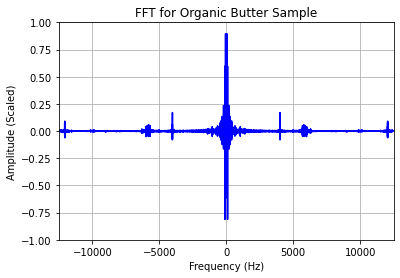

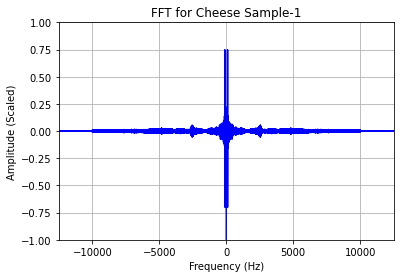

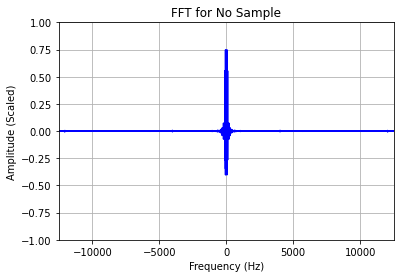

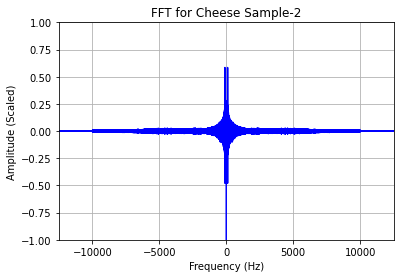

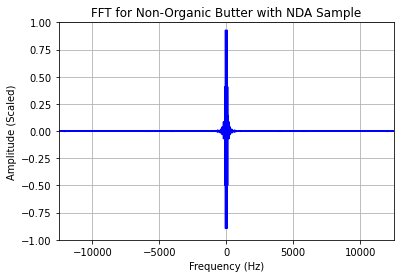

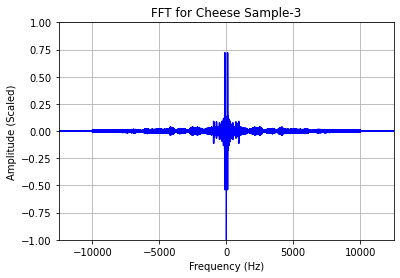

In [ ]:
for f in filenames:
  plot_fft(f, file_sample_dict, plot="double-sided", freq_range=12500)

## Plot only positive spectrum of FFT

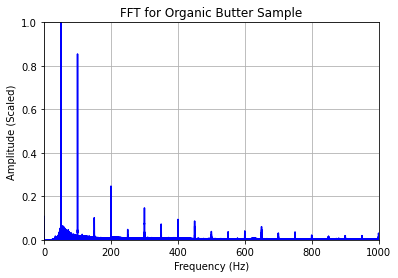

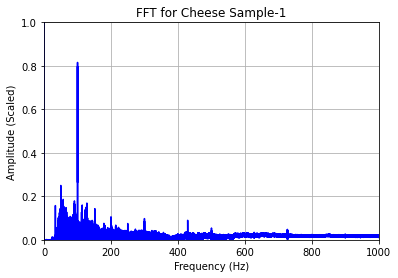

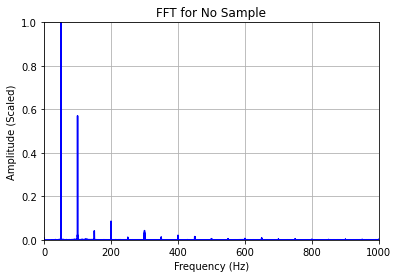

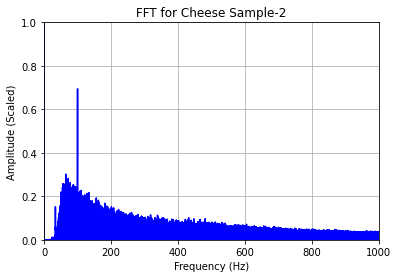

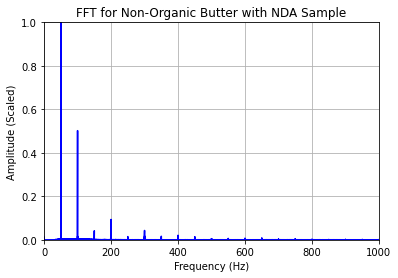

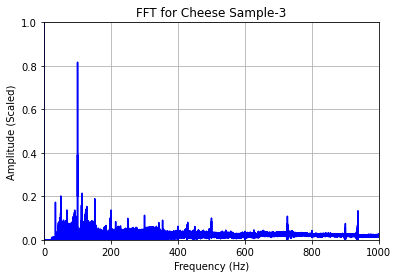

In [ ]:
for f in filenames:
  plot_fft(f, file_sample_dict, plot="single-sided", freq_range=1000)

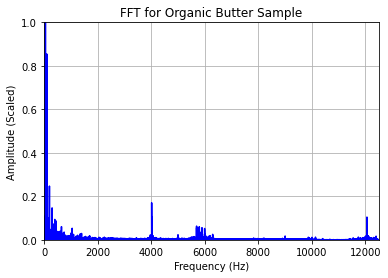

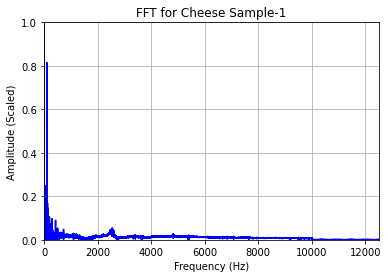

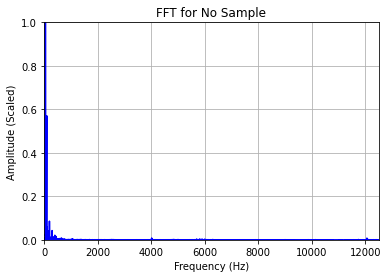

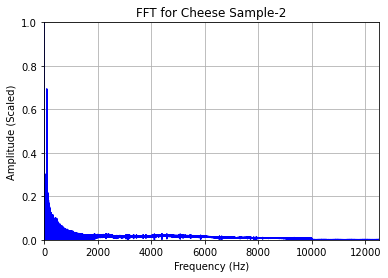

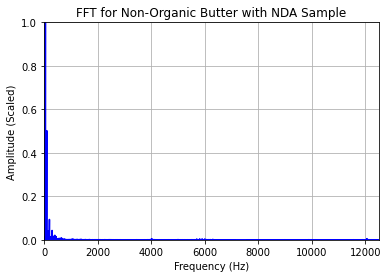

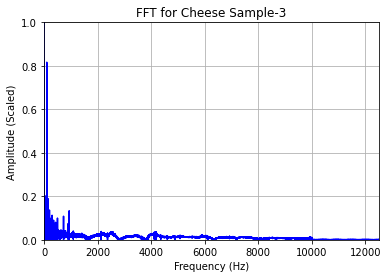

In [ ]:
for f in filenames:
  plot_fft(f, file_sample_dict, plot="single-sided", freq_range=12500)